In [1]:
random_state = 456

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report

# Accessing Image Files using Pathlib

In [3]:
# to manage windows path better
import pathlib

In [4]:
file_path = './datasets/flower_photos/' # path of our folowe directory

file_path = pathlib.Path(file_path) # changing the path string into a WindowsPath object
file_path                           # WindowsPath object makes accessing files/folders inside the dir easy

WindowsPath('datasets/flower_photos')

In [5]:
for i in file_path.glob('./*'): # all the folders inside current dir
    print(i)

datasets\flower_photos\daisy
datasets\flower_photos\dandelion
datasets\flower_photos\LICENSE.txt
datasets\flower_photos\roses
datasets\flower_photos\sunflowers
datasets\flower_photos\tulips


In [6]:
for i in file_path.glob('./*/*.jpg'): # all the pictures inside the folders
    print(i)

datasets\flower_photos\daisy\100080576_f52e8ee070_n.jpg
datasets\flower_photos\daisy\10140303196_b88d3d6cec.jpg
datasets\flower_photos\daisy\10172379554_b296050f82_n.jpg
datasets\flower_photos\daisy\10172567486_2748826a8b.jpg
datasets\flower_photos\daisy\10172636503_21bededa75_n.jpg
datasets\flower_photos\daisy\102841525_bd6628ae3c.jpg
datasets\flower_photos\daisy\1031799732_e7f4008c03.jpg
datasets\flower_photos\daisy\10391248763_1d16681106_n.jpg
datasets\flower_photos\daisy\10437754174_22ec990b77_m.jpg
datasets\flower_photos\daisy\10437770546_8bb6f7bdd3_m.jpg
datasets\flower_photos\daisy\10437929963_bc13eebe0c.jpg
datasets\flower_photos\daisy\10466290366_cc72e33532.jpg
datasets\flower_photos\daisy\10466558316_a7198b87e2.jpg
datasets\flower_photos\daisy\10555749515_13a12a026e.jpg
datasets\flower_photos\daisy\10555815624_dc211569b0.jpg
datasets\flower_photos\daisy\10555826524_423eb8bf71_n.jpg
datasets\flower_photos\daisy\10559679065_50d2b16f6d.jpg
datasets\flower_photos\daisy\105806915_

datasets\flower_photos\dandelion\14060367700_fe87e99b6a_m.jpg
datasets\flower_photos\dandelion\14065420729_9b388bf7cb_m.jpg
datasets\flower_photos\dandelion\14070457521_8eb41f65fa.jpg
datasets\flower_photos\dandelion\14070463051_86ab57ab36.jpg
datasets\flower_photos\dandelion\14076873230_d0bd53b220.jpg
datasets\flower_photos\dandelion\14084345111_8a4cb05a31.jpg
datasets\flower_photos\dandelion\14085038920_2ee4ce8a8d.jpg
datasets\flower_photos\dandelion\14093744313_b66bc95072.jpg
datasets\flower_photos\dandelion\14093789753_f0f1acdb57.jpg
datasets\flower_photos\dandelion\140951103_69847c0b7c.jpg
datasets\flower_photos\dandelion\14126515096_1134fae695.jpg
datasets\flower_photos\dandelion\14128835667_b6a916222c.jpg
datasets\flower_photos\dandelion\14128839257_23def53028.jpg
datasets\flower_photos\dandelion\141340262_ca2e576490.jpg
datasets\flower_photos\dandelion\1413979148_b40d63db90_m.jpg
datasets\flower_photos\dandelion\14164392167_650946a169_n.jpg
datasets\flower_photos\dandelion\1416

datasets\flower_photos\dandelion\6060576850_984176cf4f_n.jpg
datasets\flower_photos\dandelion\6103898045_e066cdeedf_n.jpg
datasets\flower_photos\dandelion\6104442744_ee2bcd32e7_n.jpg
datasets\flower_photos\dandelion\61242541_a04395e6bc.jpg
datasets\flower_photos\dandelion\6132275522_ce46b33c33_m.jpg
datasets\flower_photos\dandelion\6146107825_45f708ecd7_n.jpg
datasets\flower_photos\dandelion\6208857436_14a65fe4af_n.jpg
datasets\flower_photos\dandelion\62293290_2c463891ff_m.jpg
datasets\flower_photos\dandelion\6229634119_af5fec0a22.jpg
datasets\flower_photos\dandelion\6250363717_17732e992e_n.jpg
datasets\flower_photos\dandelion\6400843175_ef07053f8f_m.jpg
datasets\flower_photos\dandelion\645330051_06b192b7e1.jpg
datasets\flower_photos\dandelion\6495802659_98b57e0cca_m.jpg
datasets\flower_photos\dandelion\674407101_57676c40fb.jpg
datasets\flower_photos\dandelion\6888894675_524a6accab_n.jpg
datasets\flower_photos\dandelion\6897671808_57230e04c5_n.jpg
datasets\flower_photos\dandelion\69001

datasets\flower_photos\roses\6864417932_36fa4ceecf_n.jpg
datasets\flower_photos\roses\6867597533_d65d1c39fb_n.jpg
datasets\flower_photos\roses\6879112993_5a29208438_n.jpg
datasets\flower_photos\roses\6936225976_a91b60d8c2_m.jpg
datasets\flower_photos\roses\6950609394_c53b8c6ac0_m.jpg
datasets\flower_photos\roses\6969041818_a505baa68e_m.jpg
datasets\flower_photos\roses\7147367479_f7a6ef0798.jpg
datasets\flower_photos\roses\7186509956_c37c02fb43_n.jpg
datasets\flower_photos\roses\7187035716_5d0fb95c31_n.jpg
datasets\flower_photos\roses\7211616670_2d49ecb3a5_m.jpg
datasets\flower_photos\roses\7251352826_69b62cba2c_m.jpg
datasets\flower_photos\roses\7285188160_49d84b95a3_m.jpg
datasets\flower_photos\roses\7302931078_30054c1970_n.jpg
datasets\flower_photos\roses\7304710956_015b41f802_m.jpg
datasets\flower_photos\roses\7316409504_7cf3707f8a_m.jpg
datasets\flower_photos\roses\7345657862_689366e79a.jpg
datasets\flower_photos\roses\7376471712_e1be793f94.jpg
datasets\flower_photos\roses\73764737

datasets\flower_photos\sunflowers\18843967474_9cb552716b.jpg
datasets\flower_photos\sunflowers\18972803569_1a0634f398_m.jpg
datasets\flower_photos\sunflowers\19349582128_68a662075e_n.jpg
datasets\flower_photos\sunflowers\19359539074_d7e32e6616_n.jpg
datasets\flower_photos\sunflowers\193874852_fb633d8d00_n.jpg
datasets\flower_photos\sunflowers\193878348_43571127b9_n.jpg
datasets\flower_photos\sunflowers\19442589512_e733cfea0f.jpg
datasets\flower_photos\sunflowers\19453165201_2aa747e0bf.jpg
datasets\flower_photos\sunflowers\19504937128_a4ae90fcbd_m.jpg
datasets\flower_photos\sunflowers\19508264965_d1dfb565ea_n.jpg
datasets\flower_photos\sunflowers\19519101829_46af0b4547_m.jpg
datasets\flower_photos\sunflowers\19595718862_c68896370c_m.jpg
datasets\flower_photos\sunflowers\19697910486_0086d893a2.jpg
datasets\flower_photos\sunflowers\197011740_21825de2bf.jpg
datasets\flower_photos\sunflowers\19710076021_f5bb162540.jpg
datasets\flower_photos\sunflowers\19710925313_31682fa22b_m.jpg
datasets\f

datasets\flower_photos\tulips\4644110077_ff252cd7c4.jpg
datasets\flower_photos\tulips\466409031_4c10294db5_m.jpg
datasets\flower_photos\tulips\467702445_b8676f60fb_n.jpg
datasets\flower_photos\tulips\467770225_e3b41d4dd3_n.jpg
datasets\flower_photos\tulips\4679869990_7c5f28f2fe_n.jpg
datasets\flower_photos\tulips\4681062529_36186617d9.jpg
datasets\flower_photos\tulips\470690620_9d3a5bb239.jpg
datasets\flower_photos\tulips\471298577_cc7558bcf1.jpg
datasets\flower_photos\tulips\478765271_6a8ca1cfa1_m.jpg
datasets\flower_photos\tulips\480228053_513791d474.jpg
datasets\flower_photos\tulips\4838669164_ffb6f67139.jpg
datasets\flower_photos\tulips\483880052_19fdb26a9f.jpg
datasets\flower_photos\tulips\485266837_671def8627.jpg
datasets\flower_photos\tulips\485415743_eeb5d7c1a5.jpg
datasets\flower_photos\tulips\486896118_bcc7b8e1d6.jpg
datasets\flower_photos\tulips\4890786831_91bb82a9e4_n.jpg
datasets\flower_photos\tulips\489506904_9b68ba211c.jpg
datasets\flower_photos\tulips\490541142_c37e2b41

In [7]:
len(list(file_path.glob('./*/*.jpg'))) # total number of image files present

3670

# Managing Image Files

In [8]:
list(file_path.glob('./*'))

[WindowsPath('datasets/flower_photos/daisy'),
 WindowsPath('datasets/flower_photos/dandelion'),
 WindowsPath('datasets/flower_photos/LICENSE.txt'),
 WindowsPath('datasets/flower_photos/roses'),
 WindowsPath('datasets/flower_photos/sunflowers'),
 WindowsPath('datasets/flower_photos/tulips')]

In [9]:
# Here we created a dictionary which contains path of all the files that belongs to the type the key represents
# In sort, rose key represents all rose image file paths

types = ['daisy','dandelion','roses','sunflowers','tulips']
flower_dict = {i:[] for i in types}

for i in flower_dict.keys():
    flower_dict[i] = list(file_path.glob(f'./{i}/*'))

In [10]:
flower_dict['daisy'][:5] # first five entries in daisy key

[WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10140303196_b88d3d6cec.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172379554_b296050f82_n.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172567486_2748826a8b.jpg'),
 WindowsPath('datasets/flower_photos/daisy/10172636503_21bededa75_n.jpg')]

# Visualization

### Visualization using PIL

In [11]:
# we can directly open an image file using PIL module
import PIL

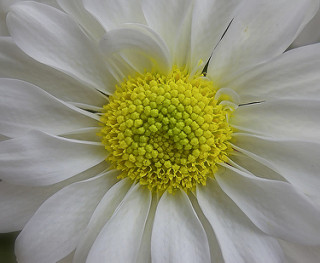

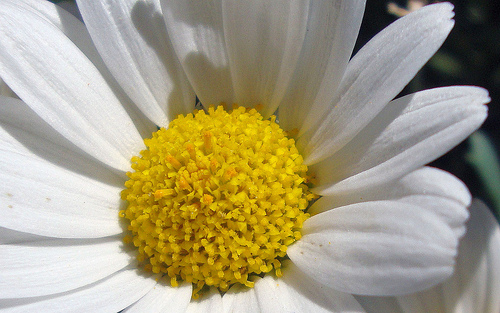

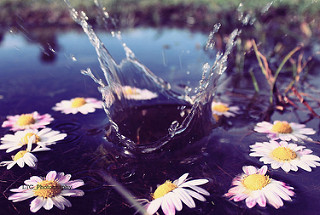

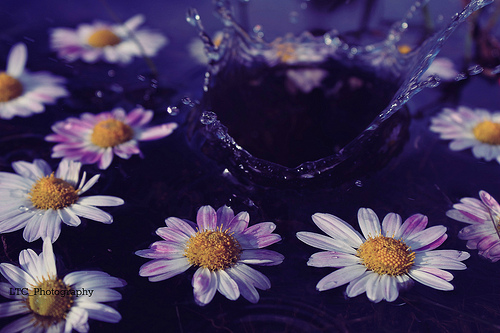

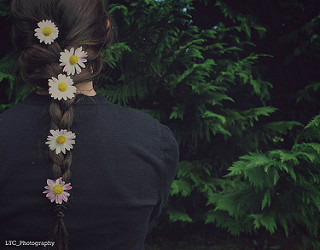

In [12]:
# PIL.Image.open('image file path') : to open an image
# It accepts all types of image file path and image file type

for i in flower_dict['daisy'][:5]:
    display(PIL.Image.open(i))

### Visualization using MatPlotLib

In [13]:
import cv2

In [14]:
# The problem is that matplotlib only takes RGB value in form of 3D matrix for an image to read and dispaly the image
# The conversion of an image file to RGB matrix can be done by OpenCv (cv2 module)

image_path = flower_dict['daisy'][0]
image_path # WindowPath Object

WindowsPath('datasets/flower_photos/daisy/100080576_f52e8ee070_n.jpg')

In [15]:
# Converting the WindowsPath Object to string as cv2 only takes string filepath

image_path = str(image_path)
image_path

'datasets\\flower_photos\\daisy\\100080576_f52e8ee070_n.jpg'

In [16]:
# Reading the image using cv2 to convert it into 3d matrix
image = cv2.imread(image_path)
image

array([[[133, 135, 135],
        [136, 138, 138],
        [142, 142, 142],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[132, 134, 134],
        [135, 137, 137],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [156, 156, 156],
        [148, 148, 148]],

       [[131, 133, 133],
        [134, 136, 136],
        [139, 141, 141],
        ...,
        [153, 153, 153],
        [155, 155, 155],
        [146, 146, 146]],

       ...,

       [[ 27,  48,  45],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [124, 125, 129]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [125, 126, 130],
        [125, 126, 130],
        [125, 126, 130]],

       [[ 26,  47,  44],
        [ 26,  47,  44],
        [ 26,  47,  44],
        ...,
        [127, 128, 132],
        [127, 128, 132],
        [127, 128, 132]]

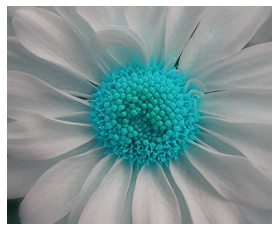

In [17]:
# Now it can be shown using matplotlib
plt.axis('off') # turn off axis
plt.imshow(image)

# Creating the dataset

In [18]:
# defining some number to each flower type

flower_labels = {j:i for i,j in enumerate(types)}
flower_labels

{'daisy': 0, 'dandelion': 1, 'roses': 2, 'sunflowers': 3, 'tulips': 4}

In [19]:
# Now we need to create the dataset which has the 3d matrixes of each image and their corresponding labels

X = []
y = []

for flowers in flower_dict.keys():
    for image in flower_dict[flowers]:
        im = cv2.imread(str(image)) # reading individual images
        im = cv2.resize(im,(180,180)) # resizing image to a singular shape (200,200,3) for uniformity
        X.append(im)
        y.append(flower_labels[flowers])
        
X = np.array(X)
y = np.array(y)

# Normalization

In [20]:
# Normalizing X 

X = X/255

# train test split

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,stratify=y,train_size=0.8,random_state=random_state)

In [22]:
# data distributed preety evenly
pd.Series(y_train).value_counts()

1    718
4    639
3    559
2    513
0    507
dtype: int64

# CNN without Augmentation

In [23]:
X.shape

(3670, 180, 180, 3)

In [32]:
cnn = keras.Sequential([
    # cnn
    keras.layers.Conv2D(filters = 40,kernel_size = (10,10) ,padding = 'same',strides = 2,input_shape = (180, 180, 3),activation = 'relu'),
    keras.layers.MaxPooling2D((5,5)),
    keras.layers.Conv2D(filters = 20,kernel_size = (10,10),padding = 'same',strides = 2,activation = 'relu'),
    keras.layers.MaxPooling2D((5,5)),

    # ann
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation = 'softmax')
])

cnn.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [33]:
cnn.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 27s 294ms/step - loss: 1.5485 - accuracy: 0.2742
Epoch 2/30
92/92 [==============================] - 30s 327ms/step - loss: 1.3721 - accuracy: 0.3944
Epoch 3/30
92/92 [==============================] - 32s 353ms/step - loss: 1.1916 - accuracy: 0.4980
Epoch 4/30
92/92 [==============================] - 43s 464ms/step - loss: 1.1050 - accuracy: 0.5361
Epoch 5/30
92/92 [==============================] - 48s 518ms/step - loss: 1.0239 - accuracy: 0.5702
Epoch 6/30
92/92 [==============================] - 42s 454ms/step - loss: 0.9593 - accuracy: 0.5998
Epoch 7/30
92/92 [==============================] - 39s 429ms/step - loss: 0.9373 - accuracy: 0.6131
Epoch 8/30
92/92 [==============================] - 46s 504ms/step - loss: 0.8473 - accuracy: 0.6448
Epoch 9/30
92/92 [==============================] - 39s 424ms/step - loss: 0.7877 - accuracy: 0.6764
Epoch 10/30
92/92 [==============================] - 47s 514ms/step - loss: 0.7397 - accura

In [34]:
cnn.evaluate(X_test,y_test)

23/23 [==============================] - 4s 77ms/step - loss: 1.8600 - accuracy: 0.6444


[1.8599958419799805, 0.6444141864776611]

In [35]:
y_pred = cnn.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]

23/23 [==============================] - 3s 81ms/step


Text(0.5, 69.0, 'y_predicted')

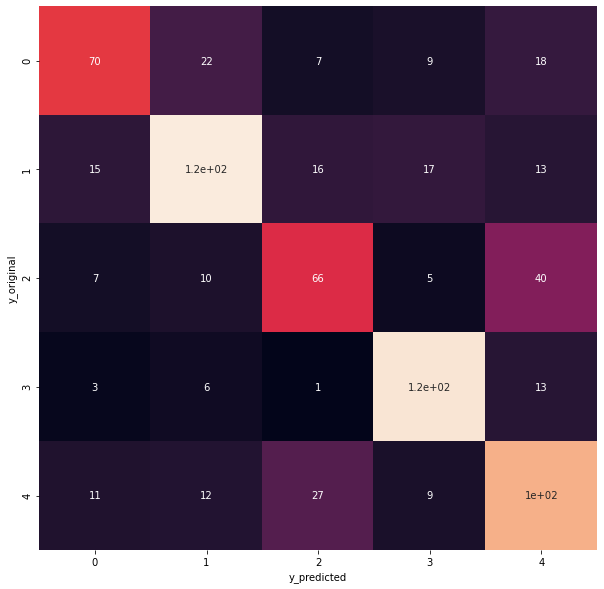

In [36]:
# Confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True, cbar = False)
plt.ylabel('y_original')
plt.xlabel('y_predicted')

In [37]:
# classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.66      0.56      0.60       126
           1       0.70      0.66      0.68       180
           2       0.56      0.52      0.54       128
           3       0.75      0.84      0.79       140
           4       0.55      0.63      0.59       160

    accuracy                           0.64       734
   macro avg       0.64      0.64      0.64       734
weighted avg       0.65      0.64      0.64       734



# Augmentation

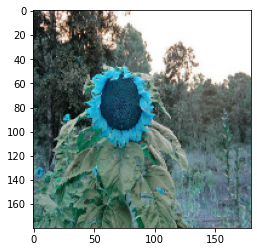

In [38]:
# defining augmentation operation and applying it on images

augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomZoom(0.5) # random_zoom
])

aug_images = augmentation(X_train) # augmentation is directly applied on the whole series
plt.imshow(aug_images[0]) 

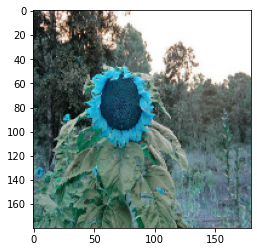

In [39]:
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomContrast(0.5) # random_contrast
])

aug_images = augmentation(X_train)
plt.imshow(aug_images[0]) 

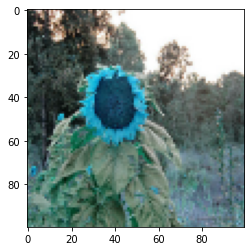

In [40]:
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomCrop(100,100) # random_crop of the specified size (100,100)
])

aug_images = augmentation(X_train)
plt.imshow(aug_images[0]) 

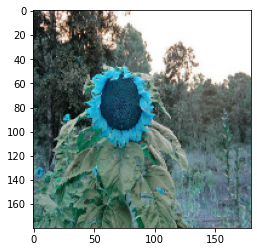

In [41]:
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip(mode = 'horizontal_and_vertical') # random flip
])

aug_images = augmentation(X_train)
plt.imshow(aug_images[0]) 

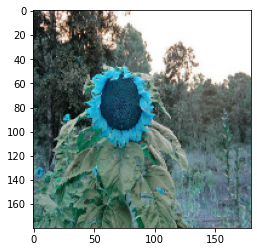

In [42]:
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomHeight(0.5) # random height
])

aug_images = augmentation(X_train)
plt.imshow(aug_images[0]) 

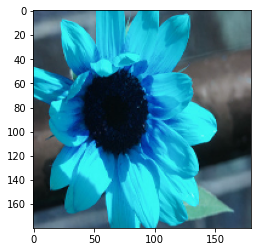

In [43]:
plt.imshow(X_train[11]) 

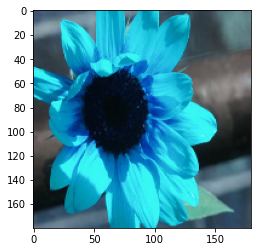

In [44]:
plt.imshow(aug_images[11]) 

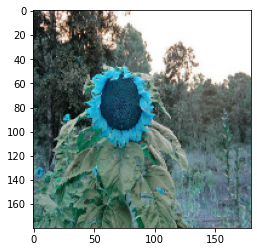

In [45]:
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomRotation(50) # random rotation
])

aug_images = augmentation(X_train)
plt.imshow(aug_images[0]) 

# CNN with Augmentation

In [46]:
# augmentation
augmentation = keras.Sequential([
    keras.layers.experimental.preprocessing.RandomFlip('horizontal_and_vertical'),
    keras.layers.experimental.preprocessing.RandomContrast(0.5),
    keras.layers.experimental.preprocessing.RandomRotation(0.5),
    keras.layers.experimental.preprocessing.RandomZoom(0.5)
])

In [47]:
# model
cnn_aug = keras.Sequential([
    #augmentation
    augmentation,
    
    # cnn
    keras.layers.Conv2D(filters = 40,kernel_size = (10,10) ,padding = 'same',strides = 2,input_shape = (180, 180, 3),activation = 'relu'),
    keras.layers.MaxPooling2D((5,5)),
    keras.layers.Conv2D(filters = 20,kernel_size = (10,10),padding = 'same',strides = 2,activation = 'relu'),
    keras.layers.MaxPooling2D((5,5)),

    # ann
    keras.layers.Flatten(),
    keras.layers.Dense(500,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(5,activation = 'softmax')
])

cnn_aug.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)

In [48]:
cnn_aug.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 47s 395ms/step - loss: 1.5746 - accuracy: 0.2561
Epoch 2/30
92/92 [==============================] - 40s 438ms/step - loss: 1.4805 - accuracy: 0.3202
Epoch 3/30
92/92 [==============================] - 50s 543ms/step - loss: 1.3290 - accuracy: 0.4074
Epoch 4/30
92/92 [==============================] - 38s 416ms/step - loss: 1.2348 - accuracy: 0.4826
Epoch 5/30
92/92 [==============================] - 43s 466ms/step - loss: 1.2110 - accuracy: 0.4959
Epoch 6/30
92/92 [==============================] - 41s 446ms/step - loss: 1.1747 - accuracy: 0.5106
Epoch 7/30
92/92 [==============================] - 40s 437ms/step - loss: 1.1646 - accuracy: 0.5245
Epoch 8/30
92/92 [==============================] - 45s 485ms/step - loss: 1.1142 - accuracy: 0.5368
Epoch 9/30
92/92 [==============================] - 39s 422ms/step - loss: 1.1209 - accuracy: 0.5395
Epoch 10/30
92/92 [==============================] - 48s 521ms/step - loss: 1.0980 - accura

In [52]:
cnn_aug.fit(X_train,y_train,epochs=30)

Epoch 1/30
92/92 [==============================] - 42s 459ms/step - loss: 0.9707 - accuracy: 0.6213
Epoch 2/30
92/92 [==============================] - 53s 581ms/step - loss: 0.9816 - accuracy: 0.6104
Epoch 3/30
92/92 [==============================] - 52s 564ms/step - loss: 0.9768 - accuracy: 0.6134
Epoch 4/30
92/92 [==============================] - 57s 622ms/step - loss: 0.9461 - accuracy: 0.6287
Epoch 5/30
92/92 [==============================] - 59s 640ms/step - loss: 0.9488 - accuracy: 0.6209
Epoch 6/30
92/92 [==============================] - 50s 538ms/step - loss: 0.9747 - accuracy: 0.6080
Epoch 7/30
92/92 [==============================] - 61s 661ms/step - loss: 0.9563 - accuracy: 0.6178
Epoch 8/30
92/92 [==============================] - 48s 526ms/step - loss: 0.9467 - accuracy: 0.6270
Epoch 9/30
92/92 [==============================] - 63s 687ms/step - loss: 0.9487 - accuracy: 0.6267
Epoch 10/30
92/92 [==============================] - 60s 647ms/step - loss: 0.9564 - accura

In [53]:
cnn_aug.evaluate(X_test,y_test)

23/23 [==============================] - 2s 70ms/step - loss: 0.8229 - accuracy: 0.6717


[0.822889506816864, 0.6716621518135071]

In [60]:
y_pred_aug = cnn_aug.predict(X_test)
y_pred_aug = [np.argmax(i) for i in y_pred_aug]

23/23 [==============================] - 1s 62ms/step


Text(0.5, 69.0, 'y_predicted')

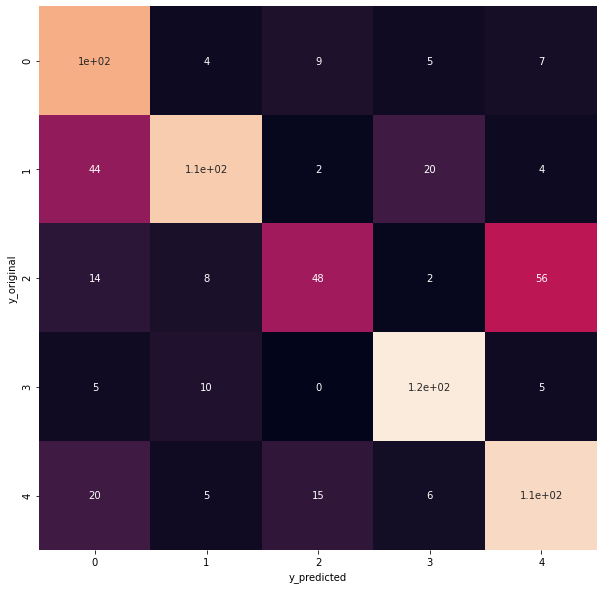

In [61]:
# Confusion matrix
plt.figure(figsize=(10,10))
sns.heatmap(confusion_matrix(y_test,y_pred_aug), annot = True, cbar = False)
plt.ylabel('y_original')
plt.xlabel('y_predicted')

In [62]:
# classification report
print(classification_report(y_test,y_pred_aug))

              precision    recall  f1-score   support

           0       0.55      0.80      0.65       126
           1       0.80      0.61      0.69       180
           2       0.65      0.38      0.48       128
           3       0.78      0.86      0.82       140
           4       0.61      0.71      0.66       160

    accuracy                           0.67       734
   macro avg       0.68      0.67      0.66       734
weighted avg       0.69      0.67      0.66       734

